<a href="https://colab.research.google.com/github/viecooo/ABD-KELOMPOK-8-SAINS-DATA-2022/blob/main/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **info data**



In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay
)

import matplotlib.pyplot as plt

DATA_PATH = Path("/content/final_data.csv")
df = pd.read_csv(DATA_PATH)
print(df.shape)


print("Dataset berhasil dimuat ✅")
print("Shape data:", df.shape)
display(df.head())


(970960, 24)
Dataset berhasil dimuat ✅
Shape data: (970960, 24)


,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_duration,long_time_user,total_transactions,...,last_membership_expire,avg_amt_per_day,autorenew_and_not_cancel,membership_duration,days_since_last_transaction,pct_discount_transactions,total_listening_secs,avg_listening_secs,active_days,last_user_log_date
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013-12-23 00:00:00,1195.0,1.0,0.0,...,0,0.000000,0.0,0.000,0.0,0.0,80598.557,7327.141545,11.0,2017-03-29 00:00:00
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,2013-12-23 00:00:00,1195.0,1.0,1.0,...,2017-04-11 00:00:00,6.000000,0.0,31.000,21.0,0.0,6986.509,1164.418167,6.0,2017-03-20 00:00:00
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27 00:00:00,1191.0,1.0,2.0,...,2017-06-15 00:00:00,1.666667,0.0,48.000,18.0,0.0,67810.467,3390.523350,20.0,2017-03-31 00:00:00
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,0,7.0,2014-01-09 00:00:00,1178.0,1.0,10.0,...,2018-01-08 00:00:00,4.966667,1.0,685.100,480.0,0.0,0.000,0.000000,0.0,0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,2014-01-25 00:00:00,1162.0,1.0,8.0,...,2017-09-18 00:00:00,3.300000,1.0,181.375,16.0,0.0,239882.241,15992.149400,15.0,2017-03-31 00:00:00


In [ ]:
print("INFO UMUM DATASET")
print(f"Jumlah baris (observasi): {df.shape[0]}")
print(f"Jumlah kolom           : {df.shape[1]}")


===== INFO UMUM DATASET =====
Jumlah baris (observasi): 970960
Jumlah kolom           : 24


In [ ]:
print("\n DAFTAR VARIABEL ")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")



===== DAFTAR VARIABEL =====
1. msno
2. is_churn
3. city
4. bd
5. gender
6. registered_via
7. registration_init_time
8. registration_duration
9. long_time_user
10. total_transactions
11. total_payment
12. avg_plan_days
13. cancel_rate
14. auto_renew_rate
15. last_membership_expire
16. avg_amt_per_day
17. autorenew_and_not_cancel
18. membership_duration
19. days_since_last_transaction
20. pct_discount_transactions
21. total_listening_secs
22. avg_listening_secs
23. active_days
24. last_user_log_date


In [ ]:
print("\nTIPE DATA")
display(df.dtypes)



===== TIPE DATA =====


,0
msno,object
is_churn,int64
city,float64
bd,float64
gender,object
registered_via,float64
registration_init_time,object
registration_duration,float64
long_time_user,float64
total_transactions,float64


In [ ]:
target_col = "is_churn"

print("\n INFO TARGET (is_churn)")
print("0 = Tidak Churn")
print("1 = Churn")



===== INFO TARGET (is_churn) =====
0 = Tidak Churn
1 = Churn


In [ ]:
print(df["is_churn"].dtype)
print(df["is_churn"].unique()[:10])


int64
[1 0]


In [ ]:
print("\nJumlah tiap kelas:")
print(df[target_col].value_counts())



Jumlah tiap kelas:
is_churn
0    883630
1     87330
Name: count, dtype: int64


# Evaluasi Model Utama (Logistic Regression)

**Topik/Problem:** Prediksi *churn* pelanggan (kolom target: `is_churn`, 1 = churn, 0 = tidak churn)  
**Model utama:** Logistic Regression  
**Dataset:** `final_data.csv` (data yg dari depina dan besih)




## **Preprocessing & Feature Engineering**

Karena Logistic Regression membutuhkan input numerik:
- Kolom kategori (mis. `gender`) di-*encode* dengan **One-Hot Encoding**
- Kolom numerik di-*scale* (StandardScaler)
- Kolom tanggal (`registration_init_time`, `last_membership_expire`, `last_user_log_date`) diparse menjadi `datetime` lalu diubah menjadi angka (mis. *timestamp*) supaya bisa dipakai model.
- Kolom identitas seperti `msno` (ID user) **tidak dipakai** sebagai fitur, karena biasanya tidak memiliki makna prediktif langsung dan bisa membuat model "menghafal" ID.


In [ ]:
data = df.copy()

# Drop kolom ID
if "msno" in data.columns:
    data = data.drop(columns=["msno"])

# Parse tanggal -> timestamp (detik)
date_cols = [c for c in ["registration_init_time", "last_membership_expire", "last_user_log_date"] if c in data.columns]
for c in date_cols:
    data[c] = pd.to_datetime(data[c], errors="coerce")
    # ubah ke unix timestamp seconds (float), NaT -> NaN
    data[c] = (data[c].view("int64") / 1e9).replace([-9.22e9], np.nan)  # guard NaT; akan jadi NaN pada baris NaT

# Definisikan X dan y
y = data[target_col].astype(int)
X = data.drop(columns=[target_col])

# Deteksi kolom kategori dan numerik
categorical_cols = [c for c in X.columns if X[c].dtype == "object"]
numeric_cols = [c for c in X.columns if c not in categorical_cols]

print("Jumlah fitur:", X.shape[1])
print("Categorical cols:", categorical_cols)
print("Numeric cols:", numeric_cols[:10], "..." if len(numeric_cols) > 10 else "")


SAMPLE_FRAC = 1.0
if SAMPLE_FRAC < 1.0:
    X_sampled, _, y_sampled, _ = train_test_split(
        X, y, train_size=SAMPLE_FRAC, stratify=y, random_state=RANDOM_STATE
    )
    X, y = X_sampled, y_sampled
    print(f"⚠️ Menggunakan sample {SAMPLE_FRAC*100:.0f}% data ->", X.shape)


/tmp/ipython-input-3878767308.py:12: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  data[c] = (data[c].view("int64") / 1e9).replace([-9.22e9], np.nan)  # guard NaT; akan jadi NaN pada baris NaT
/tmp/ipython-input-3878767308.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[c] = pd.to_datetime(data[c], errors="coerce")
/tmp/ipython-input-3878767308.py:12: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  data[c] = (data[c].view("int64") / 1e9).replace([-9.22e9], np.nan)  # guard NaT; akan jadi NaN pada baris NaT
/tmp/ipython-input-3878767308.py:12: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to c

Jumlah fitur: 22
Categorical cols: ['gender']
Numeric cols: ['city', 'bd', 'registered_via', 'registration_init_time', 'registration_duration', 'long_time_user', 'total_transactions', 'total_payment', 'avg_plan_days', 'cancel_rate'] ...


# **Train/Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

print("Train:", X_train.shape, " Test:", X_test.shape)


Train: (776768, 22)  Test: (194192, 22)


## **Pipeline Model (Preprocess + Logistic Regression)**

Kita menggunakan **Pipeline** agar preprocessing dan model terbungkus rapi dan tidak terjadi *data leakage*.

Konfigurasi:
- Numerik: `SimpleImputer(median)` + `StandardScaler`
- Kategori: `SimpleImputer(most_frequent)` + `OneHotEncoder(handle_unknown="ignore")`
- Logistic Regression: solver `saga` (cocok untuk dataset besar + one-hot), `class_weight="balanced"` agar lebih robust pada data yang tidak seimbang.


In [ ]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ],
    remainder="drop"
)

clf = LogisticRegression(
    solver="saga",
    max_iter=200,
    n_jobs=-1,
    class_weight="balanced",
    random_state=RANDOM_STATE
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", clf)
])

model


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['city', 'bd',
                                                   'registered_via',
                                                   'registration_init_time',
                                                   'registration_duration',
                                                   'long_time_user',
                                                   'total_transactions',
                                                   'total_payment',
                                                   'avg_plan_days',
                                                   'cancel_rate',
                                                   'auto_renew_rate',
                                                   'last_mem...
                                                   'pct_discount_transactions',
                                                   'total_listening_secs',
                                                   'avg_listening_secs',
                                                   'active_days',
                                                   'last_user_log_date']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=200,
                                    n_jobs=-1, random_state=42,
                                    solver='saga'))])

Training

In [ ]:
model.fit(X_train, y_train)
print("Training selesai ✅")


Training selesai ✅


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## **Evaluasi Model**

Karena ini masalah **klasifikasi biner** (churn vs tidak churn), metrik yang umum dipakai:
- **Accuracy**: proporsi prediksi benar
- **Precision**: dari yang diprediksi churn, berapa yang benar churn
- **Recall**: dari churn yang sebenarnya, berapa yang berhasil terdeteksi
- **F1-score**: keseimbangan precision & recall
- **ROC-AUC**: kemampuan model membedakan kelas 0 dan 1 pada berbagai threshold



In [ ]:
y_pred = model.predict(X_test)

# Probabilitas untuk ROC-AUC (ambil prob kelas 1)
y_proba = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
auc = roc_auc_score(y_test, y_proba)

print("=== Metrics (Test Set) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {auc:.4f}")


=== Metrics (Test Set) ===
Accuracy : 0.9357
Precision: 0.5979
Recall   : 0.8726
F1-score : 0.7095
ROC-AUC  : 0.9656


In [ ]:
print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
display(pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Pred 0", "Pred 1"]))


=== Confusion Matrix ===


,Pred 0,Pred 1
Actual 0,166475,10251
Actual 1,2226,15240


In [ ]:
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))


=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9868    0.9420    0.9639    176726
           1     0.5979    0.8726    0.7095     17466

    accuracy                         0.9357    194192
   macro avg     0.7923    0.9073    0.8367    194192
weighted avg     0.9518    0.9357    0.9410    194192



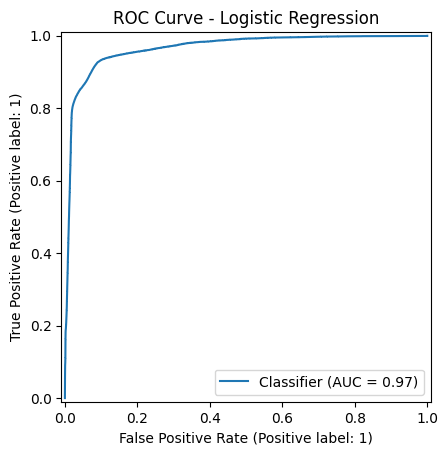

In [ ]:
# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Logistic Regression")
plt.show()

## ***FITURE IMPORTANCE***

In [ ]:
#membil komponen dari pipeline Logistic Regression
pre = model.named_steps["preprocess"]
clf = model.named_steps["clf"]
num_features = numeric_cols
ohe = pre.named_transformers_["cat"].named_steps["onehot"]
cat_features = ohe.get_feature_names_out(categorical_cols)

feature_names = np.concatenate([num_features, cat_features])
coefficients = clf.coef_[0]
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefficients,
    "abs_coefficient": np.abs(coefficients)
}).sort_values("abs_coefficient", ascending=False)

print("Top 20 Feature Importance - Logistic Regression")
display(coef_df.head(20))


Top 20 Feature Importance - Logistic Regression


,feature,coefficient,abs_coefficient
8,avg_plan_days,2.998192,2.998192
6,total_transactions,2.609080,2.609080
11,last_membership_expire,-1.963597,1.963597
15,days_since_last_transaction,1.539574,1.539574
14,membership_duration,-1.352125,1.352125
13,autorenew_and_not_cancel,-1.108599,1.108599
7,total_payment,-0.411457,0.411457
21,gender_0,-0.400693,0.400693
23,gender_male,-0.365647,0.365647
22,gender_female,-0.352005,0.352005


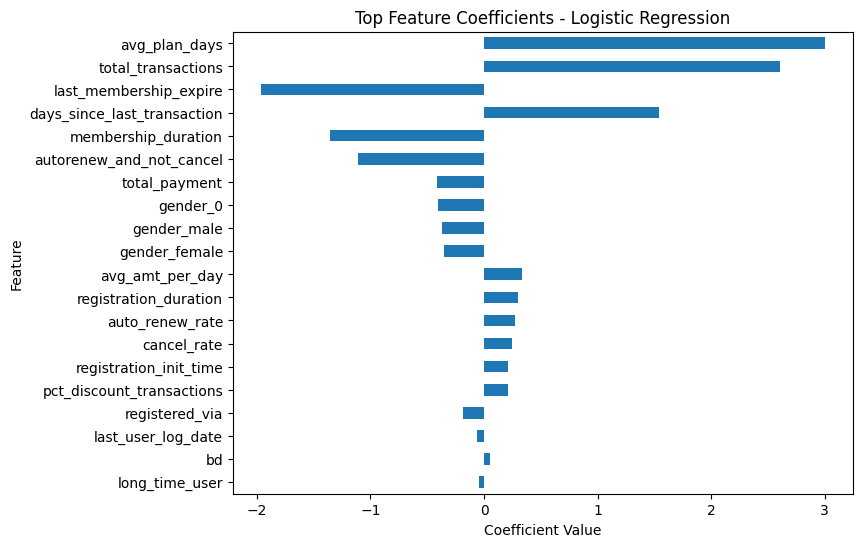

In [ ]:
topk = 20
coef_df.head(topk).plot(
    kind="barh",
    x="feature",
    y="coefficient",
    figsize=(8, 6),
    legend=False
)
plt.gca().invert_yaxis()
plt.title("Top Feature Coefficients - Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


**MMODEL KE 2 RF**

# **Preprocessing**

tidak memerlukan scaling karena model ini berbasis pohon keputusan yang menentukan split berdasarkan threshold nilai fitur, bukan jarak atau besar kecilnya skala fitur.

In [ ]:
data = df.copy()

# Drop kolom ID
if "msno" in data.columns:
    data = data.drop(columns=["msno"])

# Parse tanggal → timestamp
date_cols = [
    c for c in [
        "registration_init_time",
        "last_membership_expire",
        "last_user_log_date"
    ] if c in data.columns
]

for c in date_cols:
    data[c] = pd.to_datetime(data[c], errors="coerce")
    data[c] = (data[c].view("int64") / 1e9).replace([-9.22e9], np.nan)

y = data[target_col].astype(int)
X = data.drop(columns=[target_col])

categorical_cols = [c for c in X.columns if X[c].dtype == "object"]
numeric_cols = [c for c in X.columns if c not in categorical_cols]

/tmp/ipython-input-2975423556.py:18: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  data[c] = (data[c].view("int64") / 1e9).replace([-9.22e9], np.nan)
/tmp/ipython-input-2975423556.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[c] = pd.to_datetime(data[c], errors="coerce")
/tmp/ipython-input-2975423556.py:18: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  data[c] = (data[c].view("int64") / 1e9).replace([-9.22e9], np.nan)
/tmp/ipython-input-2975423556.py:18: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  data[c] = (data[c].view("int64") / 1e9).replace([-9.22e9], np.nan)


# **Split Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"Jumlah data train: {len(X_train)}")
print(f"Jumlah data test: {len(X_test)}")

Jumlah data train: 776768
Jumlah data test: 194192


#**Pipelien RF**

In [ ]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

rf_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

#**Training**

In [ ]:
rf_model.fit(X_train, y_train)
print("Training Random Forest selesai ✅")

Training Random Forest selesai ✅


#**Model Evaluation**

In [ ]:
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

print("Metrics (Test Set) - Random Forest")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_proba):.4f}")

Metrics (Test Set) - Random Forest
Accuracy : 0.9810
Precision: 0.8915
Recall   : 0.8980
F1-score : 0.8947
ROC-AUC  : 0.9951


In [ ]:
print("\n Classification Report")
print(classification_report(y_test, y_pred, digits=4))


 Classification Report
              precision    recall  f1-score   support

           0     0.9899    0.9892    0.9896    176726
           1     0.8915    0.8980    0.8947     17466

    accuracy                         0.9810    194192
   macro avg     0.9407    0.9436    0.9421    194192
weighted avg     0.9811    0.9810    0.9810    194192



#**Confusion Matrix & ROC Curve**

,Pred 0,Pred 1
Actual 0,174817,1909
Actual 1,1782,15684


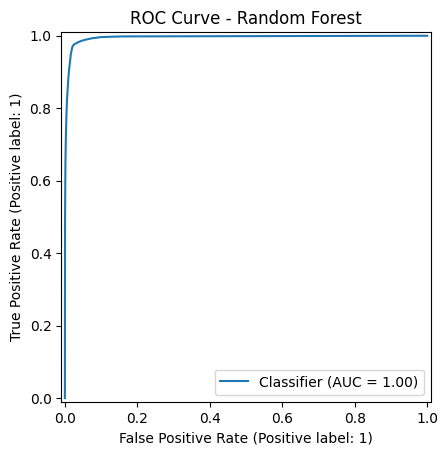

In [ ]:
cm = confusion_matrix(y_test, y_pred)
display(pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Random Forest")
plt.show()

In [ ]:
train_pred = rf_model.predict(X_train)
train_proba = rf_model.predict_proba(X_train)[:, 1]

print("Cek Overfitting:")
print(f"Train ROC-AUC: {roc_auc_score(y_train, train_proba):.4f}")
print(f"Test  ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")


Cek Overfitting:
Train ROC-AUC: 1.0000
Test  ROC-AUC: 0.9951


##**Feature importance**

In [ ]:
#membil preprocess dan classifier dari pipeline RF
pre = rf_model.named_steps["preprocess"]
rf  = rf_model.named_steps["clf"]
num_cols = numeric_cols
cat_cols = categorical_cols


ohe = pre.named_transformers_["cat"].named_steps["onehot"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)
feature_names = np.concatenate([num_cols, cat_feature_names])
importances = rf.feature_importances_

fi = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

print("Top 20 Feature Importance (Random Forest):")
display(fi.head(20))


Top 20 Feature Importance (Random Forest):


,feature,importance
14,membership_duration,0.199984
13,autorenew_and_not_cancel,0.192812
11,last_membership_expire,0.119330
10,auto_renew_rate,0.089497
7,total_payment,0.085845
15,days_since_last_transaction,0.056615
9,cancel_rate,0.043942
12,avg_amt_per_day,0.043488
6,total_transactions,0.037758
8,avg_plan_days,0.034262


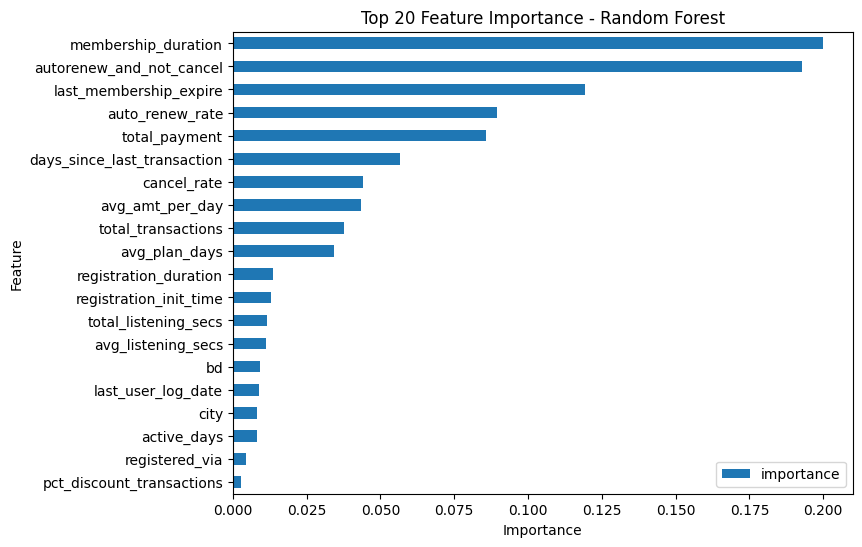

In [ ]:
topk = 20
fi.head(topk).plot(kind="barh", x="feature", y="importance", figsize=(8, 6))
plt.gca().invert_yaxis()
plt.title(f"Top {topk} Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Model terbaik: Random Forest

Recall churn lebih tinggi

Precision jauh lebih baik

ROC-AUC sangat tinggi

Dari feature importance (LR & RF), FITUR konsisten:

membership_duration

autorenew_and_not_cancel

last_membership_expire

days_since_last_transaction

cancel_rate

total_payment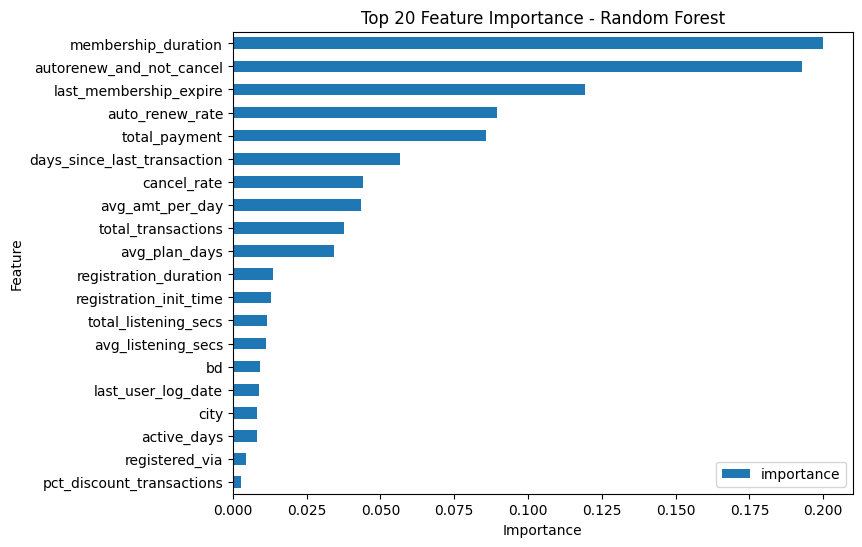


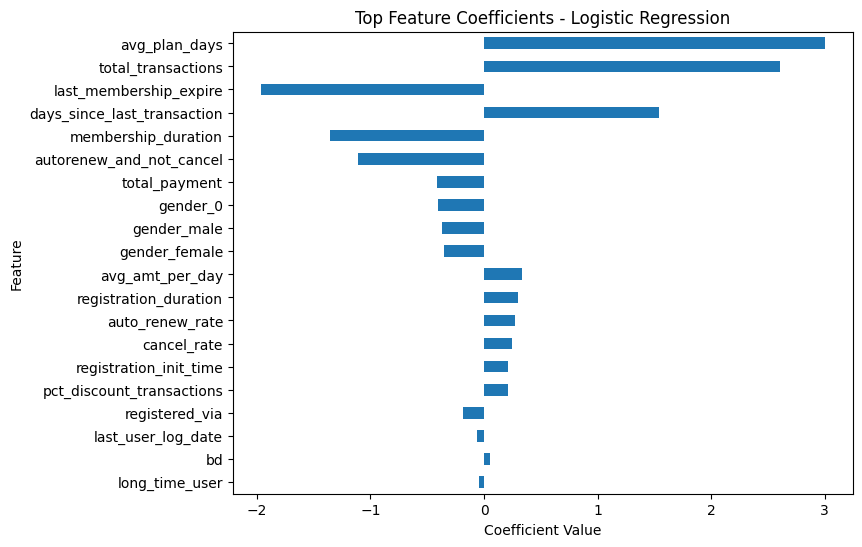

## **TOP FITUR 2 MODEL**

In [ ]:
#top fitur RegLog
top_lr = coef_df.head(10)["feature"].tolist()

#top fitur RF
top_rf = fi.head(10)["feature"].tolist()

print("Top RegLog:", top_lr)
print("Top RF:", top_rf)


Top RegLog: ['avg_plan_days', 'total_transactions', 'last_membership_expire', 'days_since_last_transaction', 'membership_duration', 'autorenew_and_not_cancel', 'total_payment', 'gender_0', 'gender_male', 'gender_female']
Top RF: ['membership_duration', 'autorenew_and_not_cancel', 'last_membership_expire', 'auto_renew_rate', 'total_payment', 'days_since_last_transaction', 'cancel_rate', 'avg_amt_per_day', 'total_transactions', 'avg_plan_days']


In [ ]:
important_features = set(top_lr).intersection(set(top_rf))
print("Fitur paling konsisten & valid:", important_features)


Fitur paling konsisten & valid: {'last_membership_expire', 'total_payment', 'autorenew_and_not_cancel', 'avg_plan_days', 'total_transactions', 'days_since_last_transaction', 'membership_duration'}


**INSIGHT**

HAL YANG PALING MEMPRENGARUHI DALAM PERHITUNGAN CHURN DIAMBIL DARI FITUR IMPORTANCE IRISAN DARI 2 MODEL YAITU RF DAN REGLOG YAITU :

last_membership_expire
→ Tanggal berakhirnya masa langganan terakhir

total_payment
→ Total pembayaran pelanggan

autorenew_and_not_cancel
→ Status perpanjangan otomatis (auto-renew) dan tidak pernah membatalkan langganan

avg_plan_days
→ Rata-rata durasi paket langganan (dalam hari)

total_transactions
→ Total jumlah transaksi pelanggan

days_since_last_transaction
→ Jumlah hari sejak transaksi terakhir

membership_duration
→ Lama waktu pelanggan menjadi anggota (durasi berlangganan)

**INSIGHT BISNIS BERDASARKAN FEATURE IMPORTANCE**

Insight 1 – Masa habis langganan adalah titik paling rawan churn
Berdasarkan feature importance, tanggal berakhirnya masa langganan terakhir (last_membership_expire) merupakan faktor yang sangat berpengaruh terhadap churn. Hal ini menunjukkan bahwa banyak pelanggan berhenti menggunakan layanan ketika masa langganannya telah habis atau mendekati habis.

Insight 2 – Auto-renew berperan penting dalam mempertahankan pelanggan
Status perpanjangan otomatis dan tidak pernah membatalkan langganan (autorenew_and_not_cancel) menjadi salah satu faktor utama penurunan churn. Pelanggan yang mengaktifkan auto-renew cenderung memiliki kemungkinan lebih kecil untuk berhenti berlangganan.

Insight 3 – Penurunan aktivitas transaksi menjadi indikator awal churn
Fitur jumlah hari sejak transaksi terakhir (days_since_last_transaction) dan total transaksi (total_transactions) menunjukkan bahwa pelanggan yang jarang atau sudah lama tidak bertransaksi memiliki risiko churn yang lebih tinggi.

Insight 4 – Durasi keanggotaan mencerminkan loyalitas pelanggan
Lama waktu pelanggan menjadi anggota (membership_duration) berpengaruh signifikan terhadap churn. Pelanggan dengan durasi keanggotaan yang lebih panjang cenderung lebih loyal dan memiliki risiko churn yang lebih rendah.

Insight 5 – Pola paket langganan memengaruhi keberlanjutan pelanggan
Rata-rata durasi paket langganan (avg_plan_days) berkontribusi terhadap churn, yang mengindikasikan bahwa tidak semua jenis paket cocok untuk retensi jangka panjang.

Insight 6 – Churn pada pelanggan bernilai tinggi berdampak besar secara finansial
Total pembayaran pelanggan (total_payment) menjadi fitur penting, sehingga churn pada pelanggan dengan nilai pembayaran tinggi dapat memberikan dampak finansial yang signifikan bagi bisnis.

Insight 7 – Total jumlah transaksi pelanggan (total_transactions) merupakan faktor yang berpengaruh terhadap churn. Pelanggan dengan jumlah transaksi yang rendah cenderung memiliki tingkat keterlibatan yang lebih rendah terhadap layanan, sehingga memiliki risiko churn yang lebih tinggi dibandingkan pelanggan yang sering bertransaksi.

**REKOMENDASI STRATEGI RETENSI PELANGGAN**


1. Insight 1 + Insight 2. Rekomendasi:
*   Kirim reminder perpanjangan sebelum masa langganan habis.
*   Dorong aktivasi fitur auto-renew.
*   Berikan insentif bagi pelanggan yang mengaktifkan auto-renew.

2. Insight 3 + Insight 7. Rekomendasi:
*   Identifikasi pelanggan dengan aktivitas transaksi rendah.
*   Jalankan kampanye re-engagement
*   Tawarkan promo atau notifikasi personal.

3. Insight 4. Rekomendasi:
*   Terapkan program loyalitas untuk pelanggan lama.
*   Berikan benefit eksklusif berdasarkan durasi keanggotaan.

4. Insight 5. Rekomendasi:
*   Evaluasi dan sesuaikan durasi paket langganan.
*   Optimalkan paket untuk retensi jangka panjang.

5. Insight 6. Rekomendasi:
*   Berikan layanan atau penawaran personal.
*   Prioritaskan retensi pelanggan bernilai tinggi.
